In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Irish Names

In [2]:
#Import Girl and Boy name datasets in csv format for Ireland as dataframes
irl_GirlNames_csv = pd.read_csv('Ireland_Girls_Names.csv')
irl_BoyNames_csv = pd.read_csv('Ireland_Boys_Names.csv')

In [3]:
#print first 5 values to determine format of dataframes
print(irl_GirlNames_csv.head())

                                           Statistic  Year   Names    UNIT  \
0  Girls Names in Ireland with 3 or More Occurrences  1964   Sarah  Number   
1  Girls Names in Ireland with 3 or More Occurrences  1964    Emma  Number   
2  Girls Names in Ireland with 3 or More Occurrences  1964    Ella  Number   
3  Girls Names in Ireland with 3 or More Occurrences  1964   Katie  Number   
4  Girls Names in Ireland with 3 or More Occurrences  1964  Sophie  Number   

   VALUE  
0  137.0  
1    8.0  
2    NaN  
3    NaN  
4    NaN  


In [4]:
#call shape method to determine size of dataset
irl_GirlNames_csv.shape

(402056, 5)

In [5]:
#call info method to determine type of data in dataset
irl_GirlNames_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402056 entries, 0 to 402055
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Statistic  402056 non-null  object 
 1   Year       402056 non-null  int64  
 2   Names      402056 non-null  object 
 3   UNIT       402056 non-null  object 
 4   VALUE      86694 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.3+ MB


In [6]:
#create new dataset where "statistics" and "UNIT" columns are omitted as they are not required/helpful. All values are the same for these columns.
irl_GirlNames = irl_GirlNames_csv.loc[:,["Year","Names","VALUE"]]
print(irl_GirlNames.head())

   Year   Names  VALUE
0  1964   Sarah  137.0
1  1964    Emma    8.0
2  1964    Ella    NaN
3  1964   Katie    NaN
4  1964  Sophie    NaN


In [7]:
#csv that was imported has duplicate row on "Year" and "Names". First row has the count of babies registered with that name that year. The second row has where that name ranked that year. 
#For this analysis, we're only interested in the count so I will drop duplicates on "Year" and "Names"
irl_GirlNames = irl_GirlNames.drop_duplicates(subset=["Year","Names"])

In [8]:
#check size of updated dataframe
irl_GirlNames.shape

(201028, 3)

In [9]:
#Rows where there were less than 3 babies registered with that name that year are reported as 'NaN'. Here I update that value to zero.
irl_GirlNames = irl_GirlNames.fillna(0)
print(irl_GirlNames)

        Year    Names  VALUE
0       1964    Sarah  137.0
1       1964     Emma    8.0
2       1964     Ella    0.0
3       1964    Katie    0.0
4       1964   Sophie    0.0
...      ...      ...    ...
201023  2021    Vaeda    4.0
201024  2021  Viviana    3.0
201025  2021   Zariah    3.0
201026  2021      Zia    3.0
201027  2021     Zoha    3.0

[201028 rows x 3 columns]


In [10]:
#the csvs I have for Girl and Boy data in Ireland are in the same format. As I want to clean the data for both datasets and make sure they are formatted the same, I will create a function as follows
#Add a gender column
#Remove columns that are not required
#Drop duplicates
#Replace NaN values with zero
#Change 'VALUE' column name to 'Count' to be more explicit
def clean_data_irl(csv_dataframe,gender):
    csv_dataframe['Gender'] = gender
    csv_dataframe = csv_dataframe.loc[:,["Year","Names","Gender","VALUE"]]
    csv_dataframe = csv_dataframe.drop_duplicates(subset=["Year","Names"])
    csv_dataframe = csv_dataframe.fillna(0)
    csv_dataframe.rename(columns={'VALUE':'Count'},inplace=True)
    return csv_dataframe

In [11]:
#run clean_data_irl function on the Boy Names dataset
irl_BoyNames = clean_data_irl(irl_BoyNames_csv,"M")
print(irl_BoyNames)

        Year    Names Gender   Count
0       1964     Jack      M     0.0
1       1964     Sean      M   171.0
2       1964    Conor      M    97.0
3       1964   Daniel      M   395.0
4       1964    James      M  1554.0
...      ...      ...    ...     ...
145865  2021    Royce      M     3.0
145866  2021    Rudra      M     3.0
145867  2021    Ryker      M     3.0
145868  2021  Sharvil      M     3.0
145869  2021     Sheá      M     3.0

[145870 rows x 4 columns]


In [12]:
#run clean_data_irl function on the Girl Names dataset
irl_GirlNames = clean_data_irl(irl_GirlNames_csv,"F")
print(irl_GirlNames)

        Year    Names Gender  Count
0       1964    Sarah      F  137.0
1       1964     Emma      F    8.0
2       1964     Ella      F    0.0
3       1964    Katie      F    0.0
4       1964   Sophie      F    0.0
...      ...      ...    ...    ...
201023  2021    Vaeda      F    4.0
201024  2021  Viviana      F    3.0
201025  2021   Zariah      F    3.0
201026  2021      Zia      F    3.0
201027  2021     Zoha      F    3.0

[201028 rows x 4 columns]


Join Girls list with Boys list

In [13]:
#Combine the Girl Names and Boy Names dataset for one dataset with all data for Ireland
irl_AllNames = pd.concat([irl_GirlNames,irl_BoyNames])
print(irl_AllNames)

        Year    Names Gender  Count
0       1964    Sarah      F  137.0
1       1964     Emma      F    8.0
2       1964     Ella      F    0.0
3       1964    Katie      F    0.0
4       1964   Sophie      F    0.0
...      ...      ...    ...    ...
145865  2021    Royce      M    3.0
145866  2021    Rudra      M    3.0
145867  2021    Ryker      M    3.0
145868  2021  Sharvil      M    3.0
145869  2021     Sheá      M    3.0

[346898 rows x 4 columns]


Create Dataset of Pop Culture Names for Comparison

In [14]:
#Each dictionary will have the name, the year that the person was active from (where the person is a "celebrity baby", active from year is the year of birth) and that person's gender
kardashians = {'name': ['Kris','Kourtney', 'Kim', 'Khloe', 'Rob', 'Kendall', 'Kylie','Mason','Penelope','Reign','North','Saint','Chicago','Psalm','Dream','True','Stormi'],
              'active_from': [2007,2005,2003,2007,2007,2007,2007,2009,2012,2014,2013,2015,2018,2019,2016,2018,2018],
              'gender': ['F','F','F','F','M','F','F','M', 'F','M','F','M','F','M','F','F','F']}

In [15]:
beckhams = {'name': ['Brooklyn','Romeo', 'Cruz', 'Harper'],
              'active_from': [1999,2002,2005,2011],
              'gender': ['M','M','M','F']}

In [16]:
royals = {'name': ['William','Harry', 'Peter','Zara','Beatrice', 'Eugenie','George','Charlotte','Louis','Archie'],
              'active_from': [1982,1984,1977,1981,1988,1990,2013,2015,2018,2019],
              'gender': ['M','M','M','F','F','F','M','F','M','M']}

In [17]:
one_direction = {'name': ['Harry','Niall','Louis','Zayn','Liam'],
              'active_from': [2010,2010,2010,2010,2010],
              'gender': ['M','M','M','M','M']}

In [18]:
solo_singers = {'name': ['Britney','Rihanna','Beyonce','Ariana','Adele','Taylor'],
              'active_from': [1998,2003,1997,2008,2006,2004],
              'gender': ['F','F','F','F','F','F']}

In [19]:
#Created a function to convert these dictionaries to dataframe to better read the data
#Convert dictionary to dataframe
#Add a 'category' column to help refine the data
#sort by gender and year
#adjust columns to preferred order 
def dict_to_dataframe(dict_name, category_name):
    df = pd.DataFrame(dict_name)
    df["category"] = category_name
    df = df.loc[:,["category","name","gender","active_from"]]
    return df

In [20]:
#Using the above function, convert all dictionaries to dataframes
kardashians_df = dict_to_dataframe(kardashians,"Kardashians")
beckhams_df = dict_to_dataframe(beckhams,"Beckhams")
royals_df = dict_to_dataframe(royals,"Royals")
one_direction_df = dict_to_dataframe(one_direction, "One Direction")
solo_singers_df = dict_to_dataframe(solo_singers, "Solo Singers")

In [21]:
#Print newly created dataframes to view data
print(kardashians_df)
print(beckhams_df)
print(royals_df)
print(one_direction_df)
print(solo_singers_df)

       category      name gender  active_from
0   Kardashians      Kris      F         2007
1   Kardashians  Kourtney      F         2005
2   Kardashians       Kim      F         2003
3   Kardashians     Khloe      F         2007
4   Kardashians       Rob      M         2007
5   Kardashians   Kendall      F         2007
6   Kardashians     Kylie      F         2007
7   Kardashians     Mason      M         2009
8   Kardashians  Penelope      F         2012
9   Kardashians     Reign      M         2014
10  Kardashians     North      F         2013
11  Kardashians     Saint      M         2015
12  Kardashians   Chicago      F         2018
13  Kardashians     Psalm      M         2019
14  Kardashians     Dream      F         2016
15  Kardashians      True      F         2018
16  Kardashians    Stormi      F         2018
   category      name gender  active_from
0  Beckhams  Brooklyn      M         1999
1  Beckhams     Romeo      M         2002
2  Beckhams      Cruz      M         2005
3  B

In [22]:
#Combine the "Pop Culture" dataframes for one dataset with all pop culture names under review
pop_culture_names = pd.concat([kardashians_df,beckhams_df,royals_df,one_direction_df,solo_singers_df])
print(pop_culture_names)

         category       name gender  active_from
0     Kardashians       Kris      F         2007
1     Kardashians   Kourtney      F         2005
2     Kardashians        Kim      F         2003
3     Kardashians      Khloe      F         2007
4     Kardashians        Rob      M         2007
5     Kardashians    Kendall      F         2007
6     Kardashians      Kylie      F         2007
7     Kardashians      Mason      M         2009
8     Kardashians   Penelope      F         2012
9     Kardashians      Reign      M         2014
10    Kardashians      North      F         2013
11    Kardashians      Saint      M         2015
12    Kardashians    Chicago      F         2018
13    Kardashians      Psalm      M         2019
14    Kardashians      Dream      F         2016
15    Kardashians       True      F         2018
16    Kardashians     Stormi      F         2018
0        Beckhams   Brooklyn      M         1999
1        Beckhams      Romeo      M         2002
2        Beckhams   

In [23]:
#Create a function to plot data for a specific dataset, name and gender with Year on the x-axis and count on the y-axis
#Used to validate that required data was present and valid before continuing
def plot_name(dataset, name, gender):
    df = dataset[(dataset['Names'] == name) & (dataset['Gender'] == gender)]
    plt.plot(df["Year"],df["Count"])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(name + " - " + gender)
    plt.show()

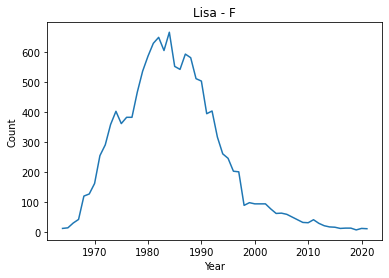

In [24]:
#Test plot_name function
plot_name(irl_AllNames,"Lisa", "F")

In [25]:
#Function for full Pop Culture names dataset
#To expand on the plot_name function, we want to compare the name's popularity against the pop culture name and the years after that person became "active"
#In this function, we take in the dataset of names, the name and gender to analyse, the category the name is from (this is because there is overlap between 
#categories, e.g. Harry is in the One Direction and Royals category) and the number of years after they became active that we want to compare against
#This function works by:
#Creating a df subset with just the details of the name and category to analyse
#Convert this df subset to a dictionary
#Create a df subset with just the name counts across the years for the required name
#Plot the name trend
#Plot the span of when the celeb became active for the number of years specified when the function is called
#Show the graph
def analyse_name(dataset, name, gender, category, year_span):
    celeb_df = pop_culture_names[(pop_culture_names['name'] == name) & (pop_culture_names['category'] == category)]
    celeb_dict = celeb_df.to_dict('list')
    names_df = dataset[(dataset['Names'] == name) & (dataset['Gender'] == gender)]
    plt.plot(names_df["Year"],names_df["Count"])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(name + " - " + gender)
    span_start = celeb_dict['active_from'][0]
    span_end = celeb_dict['active_from'][0] + year_span    
    plt.axvspan(span_start,span_end, color="#B3DE69", alpha=0.3)
    plt.show()

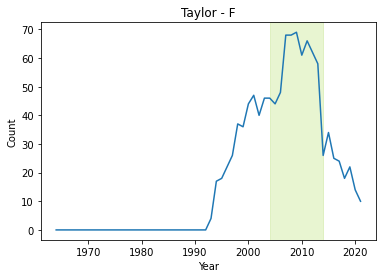

In [26]:
#Test analyse_name function
analyse_name(irl_AllNames,"Taylor","F","Solo Singers",10)

In [27]:
#The below function will use the analyse_name function to analyse every name in a category group
#This function takes in; the dataset of names, the category dataframe, and the number of years after they became active that we want to compare against
#This function works by:
#Set i to 0 which will be used to iterate through the rows in the dataframe
#The loop will run while i is less than length (number of rows) in the category dataframe under analysis
#Create a df subset with just the details of the name to analyse based on i (starts on first row and iterates through)
#Convert this df subset to a dictionary
#Call analyse_name function
#Increment i by 1 at end of the loop to move on to the next row
def analyse_group(dataset, category, year_span) :
    category_df = pop_culture_names[pop_culture_names['category'] == category]
    i = 0
    while i < len(category_df.index) :
        one_row_df = category_df.iloc[[i]]
        one_row_dict = one_row_df.to_dict('list')
        analyse_name(dataset, one_row_dict['name'][0], one_row_dict['gender'][0], category, year_span)
        i = i + 1

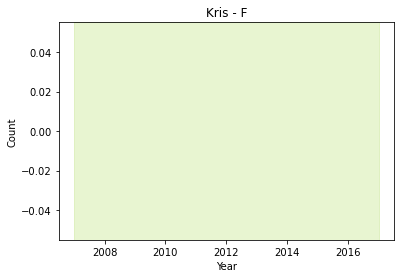

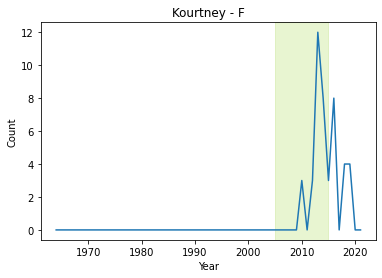

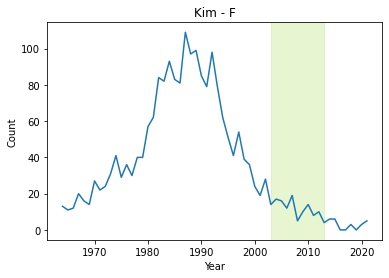

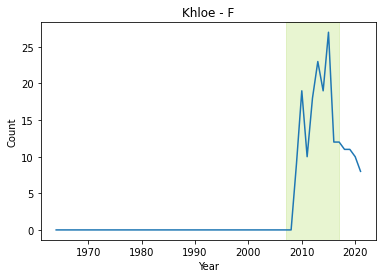

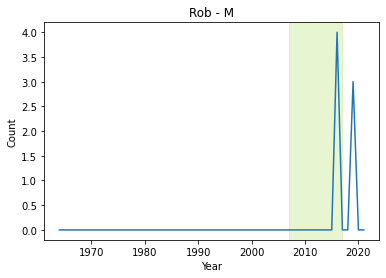

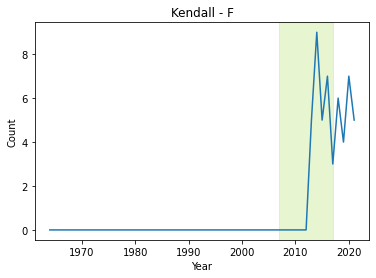

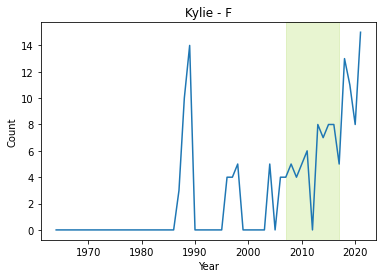

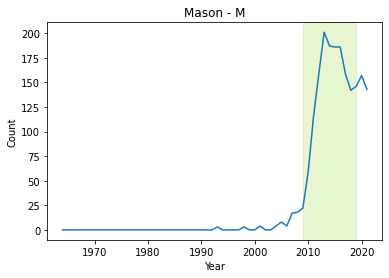

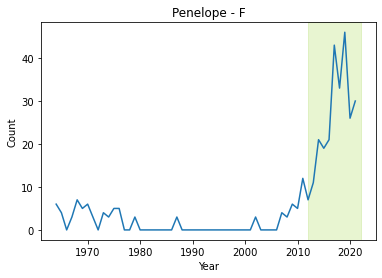

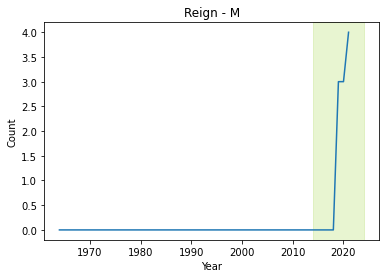

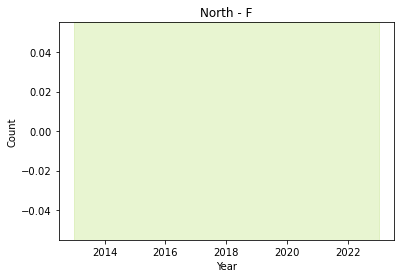

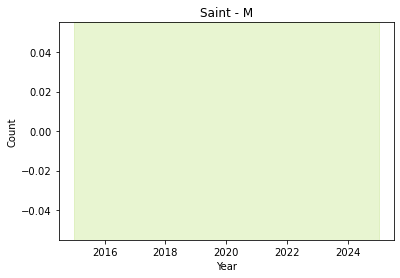

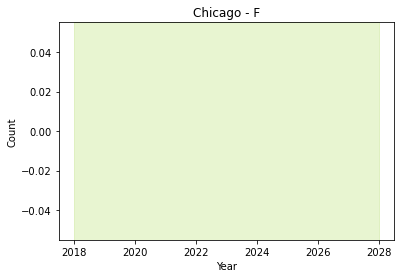

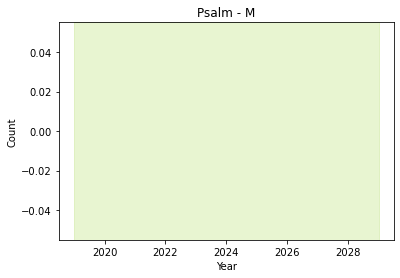

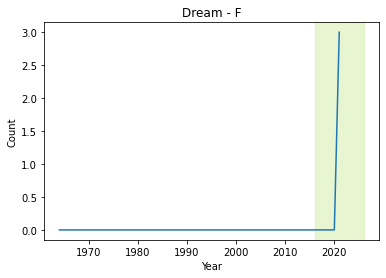

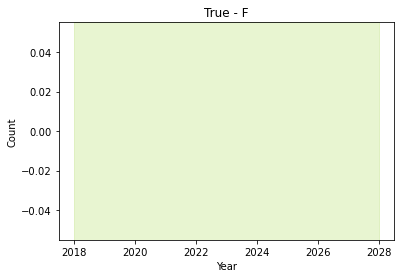

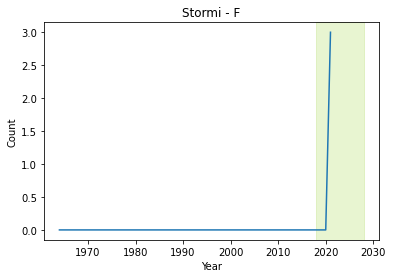

In [28]:
analyse_group(irl_AllNames,"Kardashians",10)

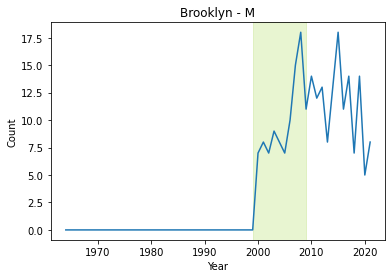

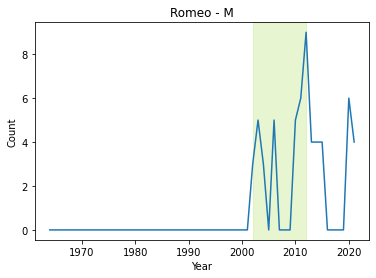

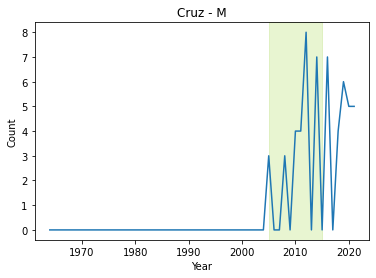

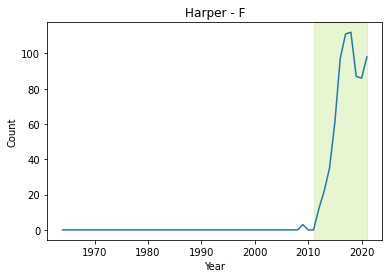

In [29]:
analyse_group(irl_AllNames,"Beckhams",10)

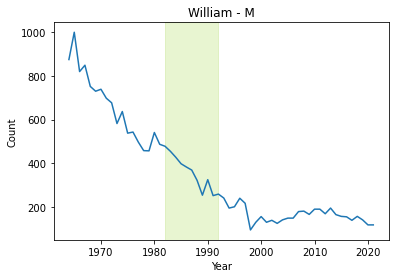

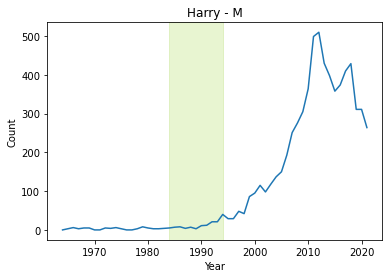

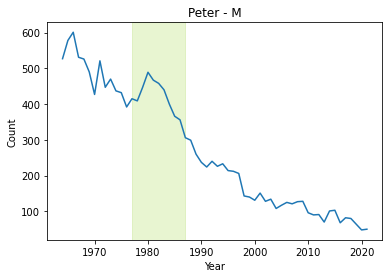

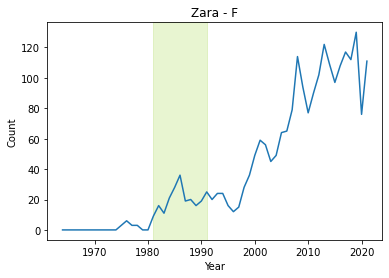

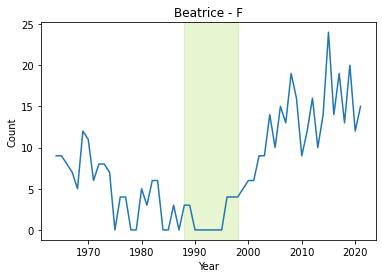

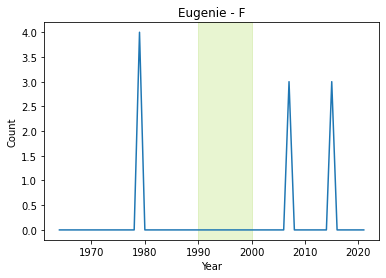

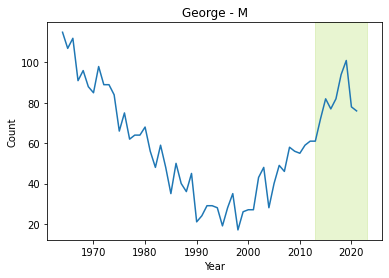

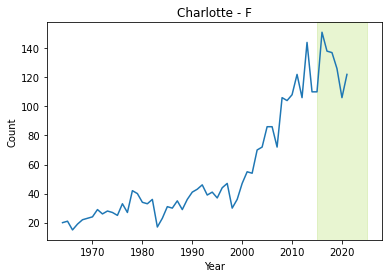

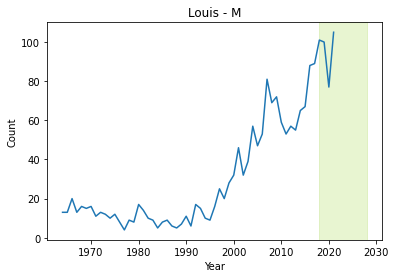

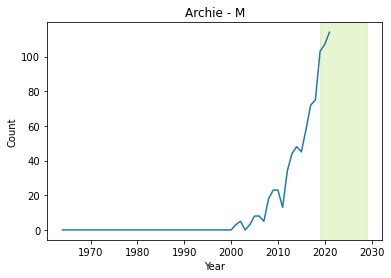

In [30]:
analyse_group(irl_AllNames,"Royals",10)

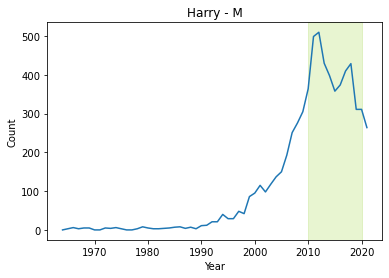

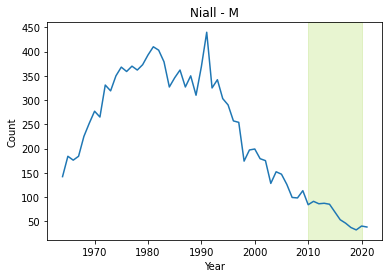

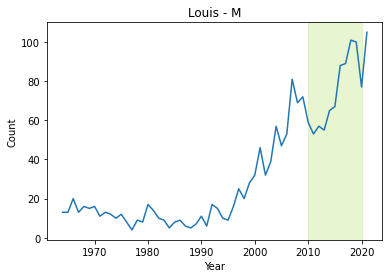

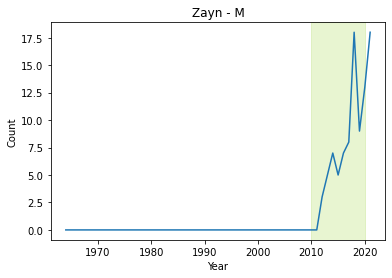

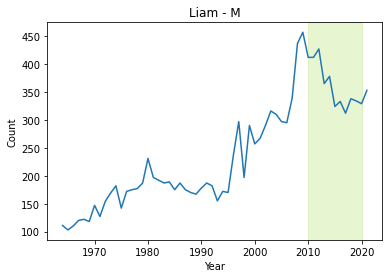

In [31]:
analyse_group(irl_AllNames,"One Direction",10)

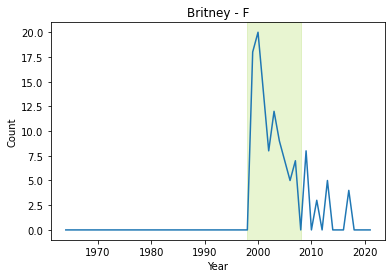

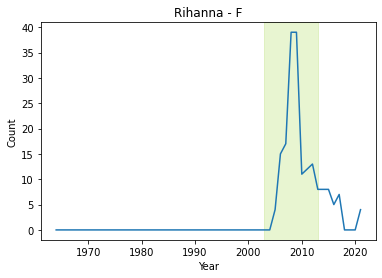

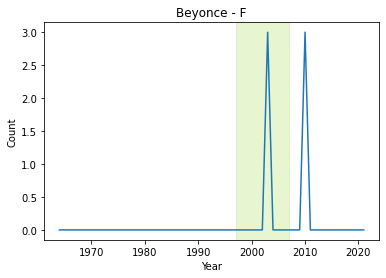

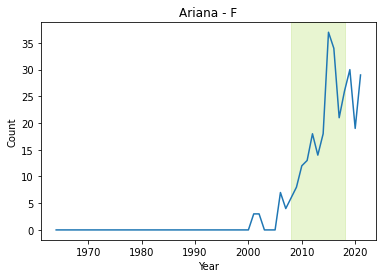

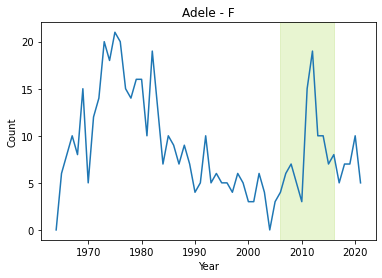

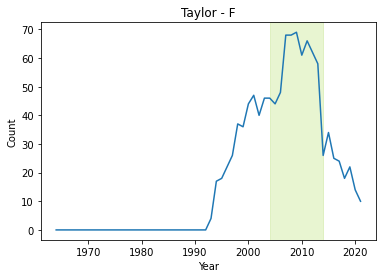

In [32]:
analyse_group(irl_AllNames,"Solo Singers",10)

In [33]:
#This function will compare trends for a name with different spellings
#I will use this function to analyse the unusual "Kardashian spelling" of Kourtney and Khloe versus the classic spellings of Courtney and Chloe
def compare_spellings(dataset, start_year, category_df, celeb_name, alternative_spelling, gender, year_span):
    fig, ax = plt.subplots()
    names_df1 = dataset[(dataset['Names'] == celeb_name) & (dataset['Gender'] == gender) & (dataset['Year'] > start_year)]
    names_df2 = dataset[(dataset['Names'] == alternative_spelling) & (dataset['Gender'] == gender) & (dataset['Year'] > start_year)]
    ax.plot(names_df1['Year'], names_df1['Count'], color="b", linestyle="--", label=celeb_name)
    ax.plot(names_df2['Year'], names_df2['Count'], color="r", linestyle="--", label=alternative_spelling)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.set_title(celeb_name + " vs. " + alternative_spelling)
    ax.legend()
    celeb_df = category_df[category_df['name'] == celeb_name]
    celeb_dict = celeb_df.to_dict('list')
    span_start = celeb_dict['active_from'][0]
    span_end = celeb_dict['active_from'][0] + year_span    
    plt.axvspan(span_start,span_end, color="#B3DE69", alpha=0.3)
    plt.show()

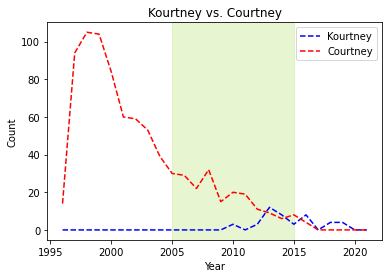

In [34]:
#Run compare_spellings function on Kourtney/Courtney
compare_spellings(irl_AllNames, 1995, kardashians_df, "Kourtney", "Courtney", "F", 10)

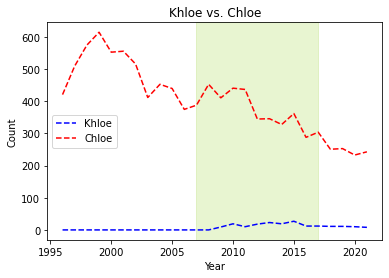

In [35]:
#Run compare_spellings function on Khloe/Chloe
compare_spellings(irl_AllNames, 1995, kardashians_df, "Khloe", "Chloe", "F", 10)

Import US Names

In [36]:
###US DATA
#Now I want to bring in data from the US to compare against Ireland
us_names_full = pd.read_csv('babyNamesUSYOB-full.csv')
print(us_names_full)

         YearOfBirth       Name Sex  Number
0               1880       Mary   F    7065
1               1880       Anna   F    2604
2               1880       Emma   F    2003
3               1880  Elizabeth   F    1939
4               1880     Minnie   F    1746
...              ...        ...  ..     ...
1858684         2015     Zykell   M       5
1858685         2015     Zyking   M       5
1858686         2015      Zykir   M       5
1858687         2015      Zyrus   M       5
1858688         2015       Zyus   M       5

[1858689 rows x 4 columns]


In [37]:
#Drop data from before 1964 to line up with the Ireland dataset
us_AllNames = us_names_full[us_names_full['YearOfBirth'] >= 1964]
print(us_AllNames)

         YearOfBirth      Name Sex  Number
621036          1964      Lisa   F   54277
621037          1964      Mary   F   40985
621038          1964     Susan   F   31515
621039          1964     Karen   F   30247
621040          1964  Patricia   F   26087
...              ...       ...  ..     ...
1858684         2015    Zykell   M       5
1858685         2015    Zyking   M       5
1858686         2015     Zykir   M       5
1858687         2015     Zyrus   M       5
1858688         2015      Zyus   M       5

[1237653 rows x 4 columns]


In [38]:
#Update column names to match irl_ALLNames dataset
us_AllNames.rename(columns={'YearOfBirth':'Year','Name':'Names','Sex':'Gender','Number':'Count'},inplace=True)
print(us_AllNames)

         Year     Names Gender  Count
621036   1964      Lisa      F  54277
621037   1964      Mary      F  40985
621038   1964     Susan      F  31515
621039   1964     Karen      F  30247
621040   1964  Patricia      F  26087
...       ...       ...    ...    ...
1858684  2015    Zykell      M      5
1858685  2015    Zyking      M      5
1858686  2015     Zykir      M      5
1858687  2015     Zyrus      M      5
1858688  2015      Zyus      M      5

[1237653 rows x 4 columns]


C:\Users\LWhyte\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [39]:
#The dataset above only has data up to 2015. I've gotten the data from 2016 to 2021 from https://www.ssa.gov/oact/babynames/limits.html
#Import data for each year with column heading as these weren't in the csv files
us_names_2016 = pd.read_csv('yob2016.csv', names=['Names','Gender','Count'])
us_names_2017 = pd.read_csv('yob2017.csv', names=['Names','Gender','Count'])
us_names_2018 = pd.read_csv('yob2018.csv', names=['Names','Gender','Count'])
us_names_2019 = pd.read_csv('yob2019.csv', names=['Names','Gender','Count'])
us_names_2020 = pd.read_csv('yob2020.csv', names=['Names','Gender','Count'])
us_names_2021 = pd.read_csv('yob2021.csv', names=['Names','Gender','Count'])

In [40]:
#This function will take the csv data and add the year as a column so it will be in the same format as us_AllNames
def us_names_year(year_csv,year):
    year_csv['Year'] = year
    csv_dataframe = year_csv.loc[:,["Year","Names","Gender","Count"]]
    return csv_dataframe

In [41]:
#Run us_names_year function on all 6 datasets
us_names_2016 = us_names_year(us_names_2016,2016)
us_names_2017 = us_names_year(us_names_2017,2017)
us_names_2018 = us_names_year(us_names_2018,2018)
us_names_2019 = us_names_year(us_names_2019,2019)
us_names_2020 = us_names_year(us_names_2020,2020)
us_names_2021 = us_names_year(us_names_2021,2021)

In [42]:
#Concatenate the data for years 2016 to 2021 to the us_AllNames dataset
us_AllNames = pd.concat([us_AllNames, us_names_2016, us_names_2017,us_names_2018,us_names_2019,us_names_2020,us_names_2021])
print(us_AllNames)

        Year     Names Gender  Count
621036  1964      Lisa      F  54277
621037  1964      Mary      F  40985
621038  1964     Susan      F  31515
621039  1964     Karen      F  30247
621040  1964  Patricia      F  26087
...      ...       ...    ...    ...
31532   2021    Zyeire      M      5
31533   2021      Zyel      M      5
31534   2021     Zyian      M      5
31535   2021     Zylar      M      5
31536   2021       Zyn      M      5

[1430603 rows x 4 columns]


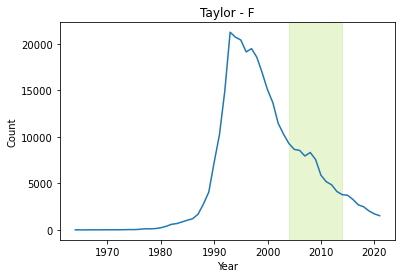

In [43]:
#Test analyse_name function on US data
analyse_name(us_AllNames,"Taylor","F","Solo Singers",10)

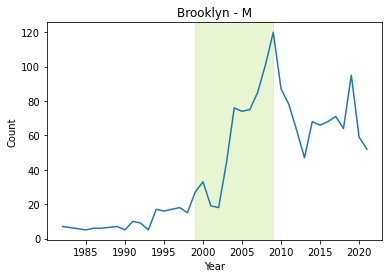

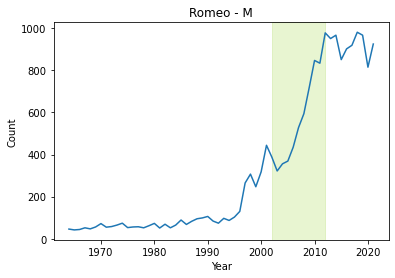

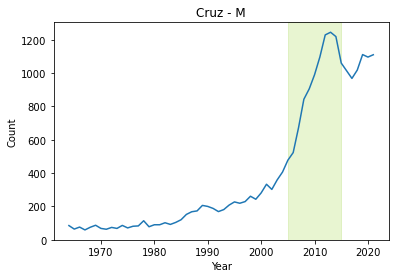

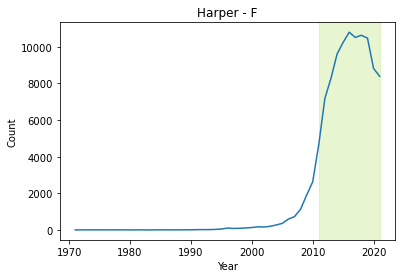

In [44]:
#Test analyse_group function on US data
analyse_group(us_AllNames,"Beckhams",10)

In [45]:
##Merge IRL and US
#Merge using an outer join to ensure records that appear only in one dataset are not lost
#Add suffixes to differentiate the IRL count from the US count
names_all = irl_AllNames.merge(us_AllNames, how='outer', on=['Year','Names','Gender'], suffixes=('_irl','_us'))
#Replace NaN values with zero
names_all = names_all.fillna(0)
names_all.head()

,Year,Names,Gender,Count_irl,Count_us
0,1964,Sarah,F,137.0,4587.0
1,1964,Emma,F,8.0,770.0
2,1964,Ella,F,0.0,565.0
3,1964,Katie,F,0.0,521.0
4,1964,Sophie,F,0.0,87.0


In [46]:
#Function to plot IRL trends against US trends
#Takes in variables for category string, name to be analysed, gender of name to be analysed and the span of years from active year of celeb to be highlighted
def compare_irl_us(category, name, gender, year_span):
    #Subset pop culture info for required name
    pop_name_df = pop_culture_names[(pop_culture_names['name'] == name) & (pop_culture_names['category'] == category)]
    #Convert to dict to pull specific values later in function
    pop_name_dict = pop_name_df.to_dict('list')
    #Define start year as 10 years before the celeb's active year to get a more focused view
    start_year = pop_name_dict['active_from'][0]-10
    #Subset baby names data for both countries for required name from start_year as above
    name_subset = names_all[(names_all['Names'] == name) & (names_all['Gender'] == gender) & (names_all['Year'] > start_year)]
    #Plot baby name data for both countries
    fig, ax = plt.subplots()
    #Plot the IRL data with the ax object, setting line colour and label colour to blue
    ax.plot(name_subset['Year'], name_subset['Count_irl'], 'blue', label="IRL") 
    ax.set_xlabel("Year")
    ax.set_ylabel("Count_irl", color='blue')
    #Create an ax2 object using .twinx method as the IRL and US data have different scales (as US has a much greater population than IRL)
    ax2 = ax.twinx()
    #Plot the US data with the ax2 object, setting line colour and label colour to red
    ax2.plot(name_subset['Year'], name_subset['Count_us'], 'red', label="US")
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Count_us", color='red')
    ax.set_title(name + " - IRL vs. US")
    #For both ax and ax2 objects, set limit on y-axis using .set_ylim to ensure they both start on zero
    ax.set_ylim(0,)
    ax2.set_ylim(0,)
    #Plot first x number of years of pop name active_from date where x is year_span
    span_start = pop_name_dict['active_from'][0]
    span_end = pop_name_dict['active_from'][0] + year_span    
    plt.axvspan(span_start,span_end, color="#B3DE69", alpha=0.2)
    plt.show()

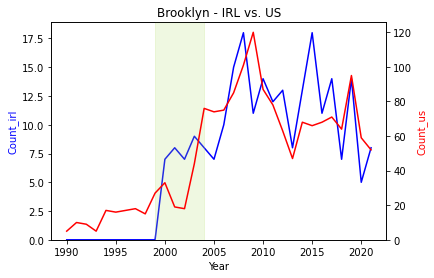

In [47]:
#Test compare_irl_us function 
compare_irl_us("Beckhams", "Brooklyn", "M", 5)

In [48]:
#Function to run compare_irl_us on all names within a category
#Takes in variables for category to be analysed and the span of years from active year of celeb to be highlighted
def compare_group(category, year_span) :
    #Creates df subset of pop_culture_names with only the records for the category under analysis
    category_df = pop_culture_names[pop_culture_names['category'] == category]
    #Set i to 0 which will be used to iterate through the rows in the dataframe
    i = 0
    #The while loop will run while i is less than length (number of rows) in the category dataframe under analysis
    while i < len(category_df.index) :
        #Create a df subset with just the details of the name to analyse based on i (starts on first row and iterates through)
        one_row_df = category_df.iloc[[i]]
        #Convert this df subset to a dictionary
        one_row_dict = one_row_df.to_dict('list')
        #Call compare_irl_us function
        compare_irl_us(one_row_dict['category'][0], one_row_dict['name'][0], one_row_dict['gender'][0], year_span)
        #Increment i by 1 at end of the loop to move on to the next row
        i = i + 1

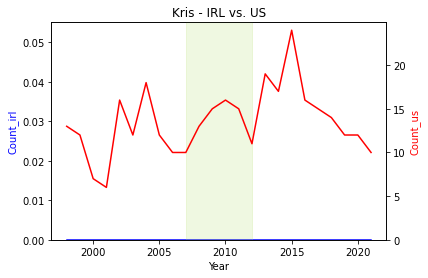

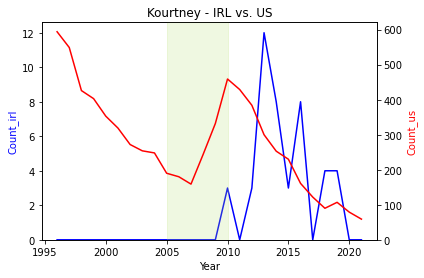

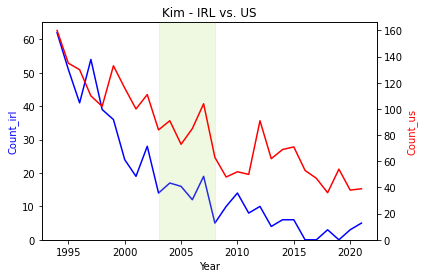

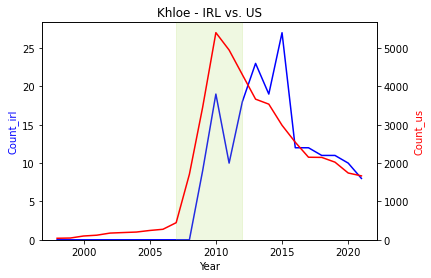

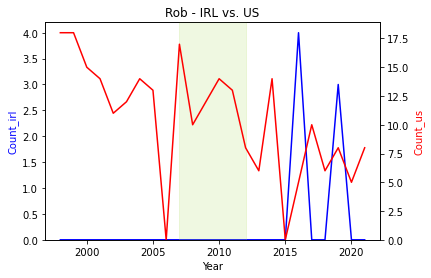

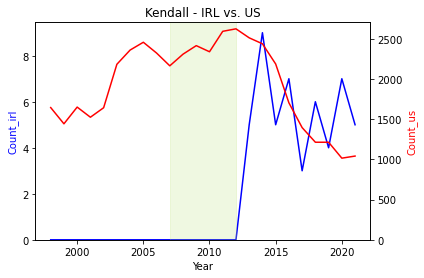

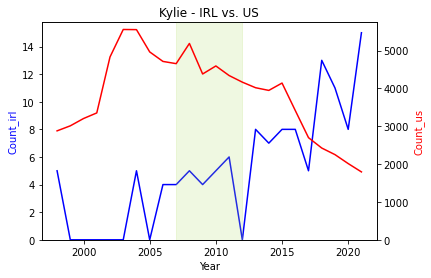

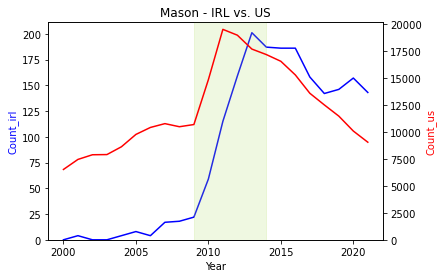

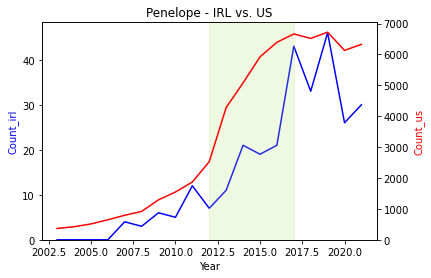

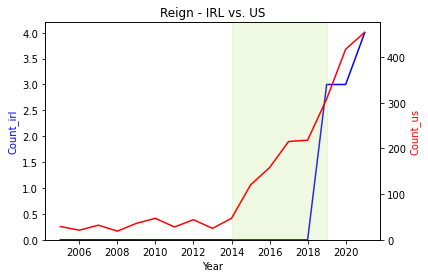

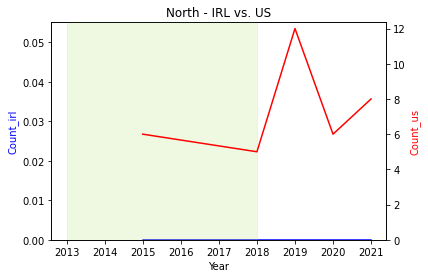

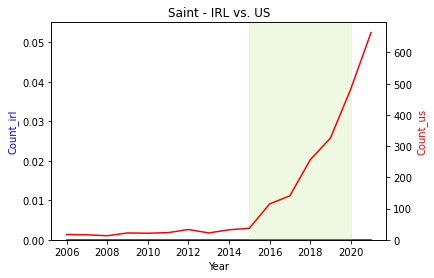

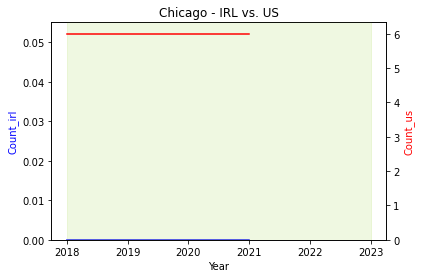

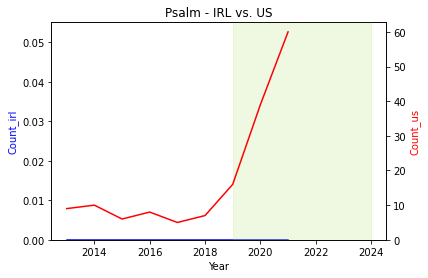

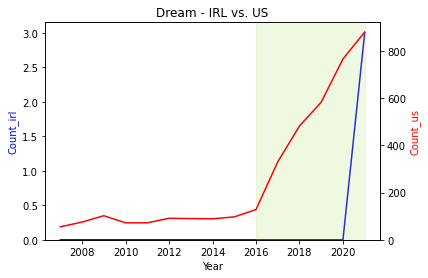

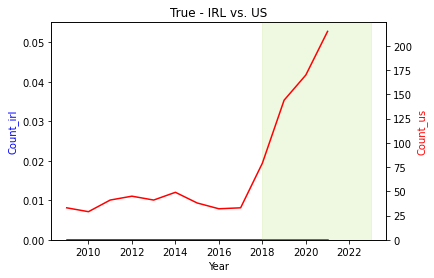

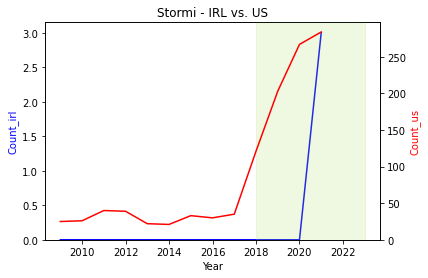

In [49]:
compare_group("Kardashians",5)

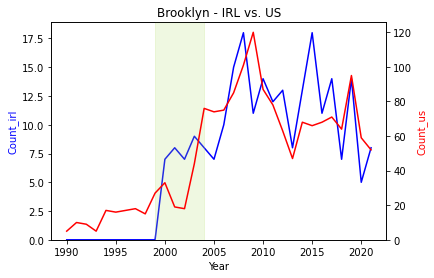

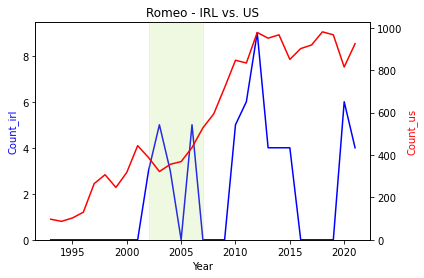

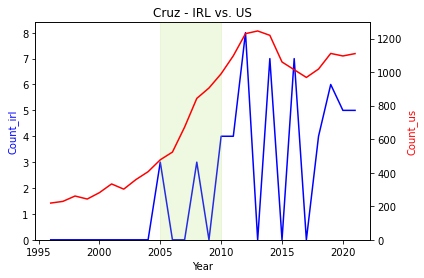

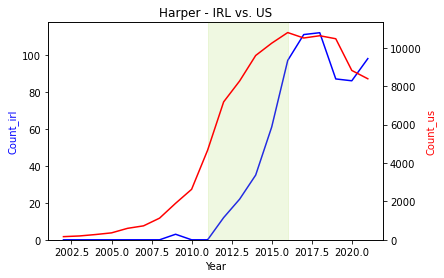

In [50]:
compare_group("Beckhams",5)

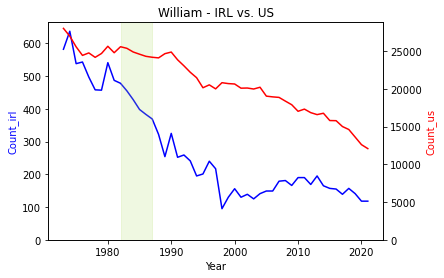

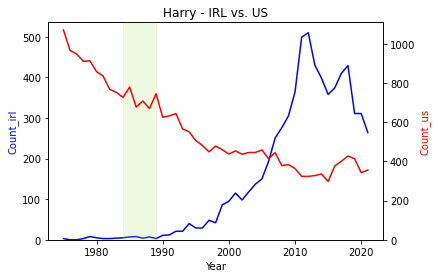

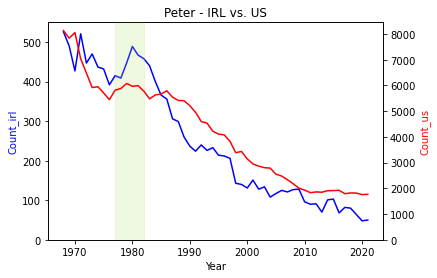

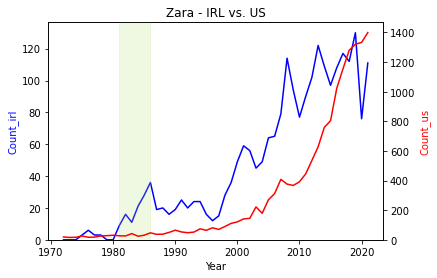

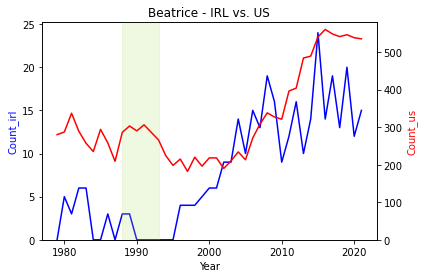

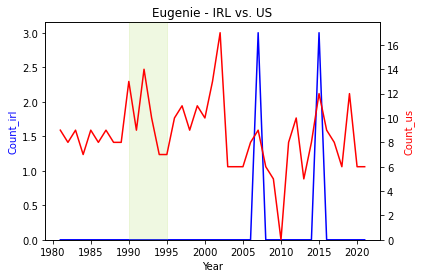

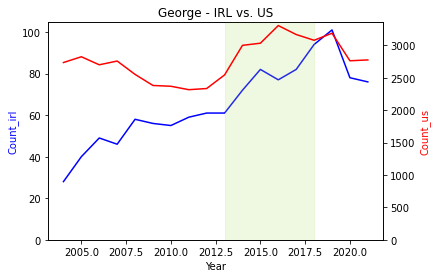

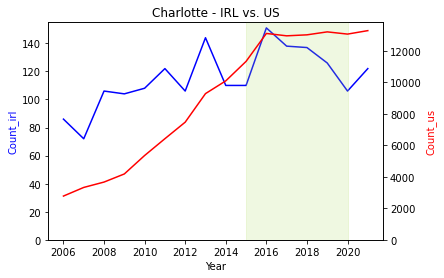

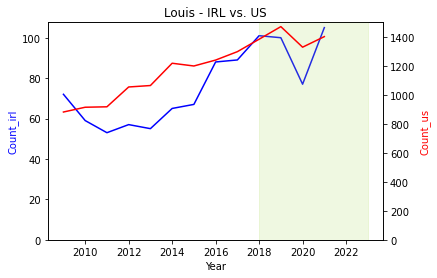

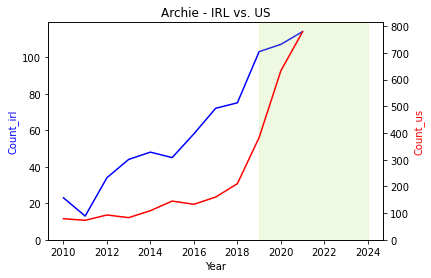

In [51]:
compare_group("Royals",5)

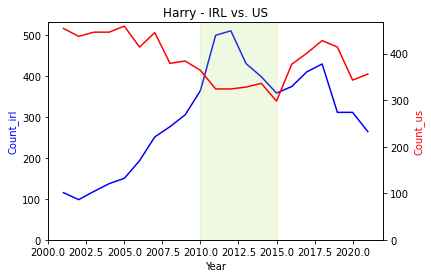

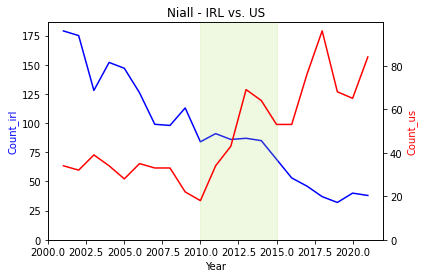

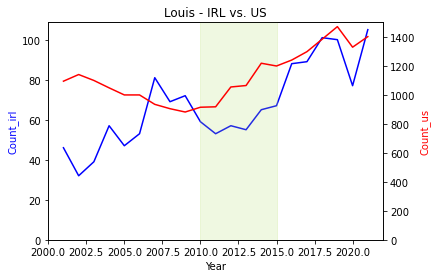

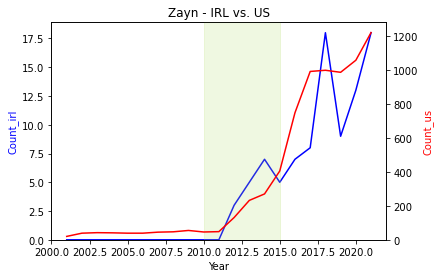

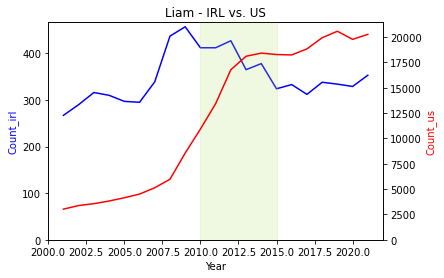

In [52]:
compare_group("One Direction",5)

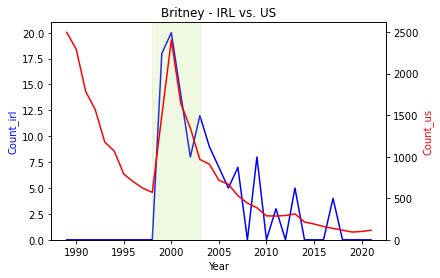

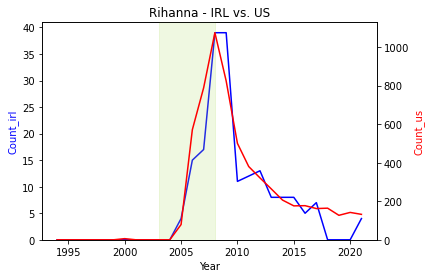

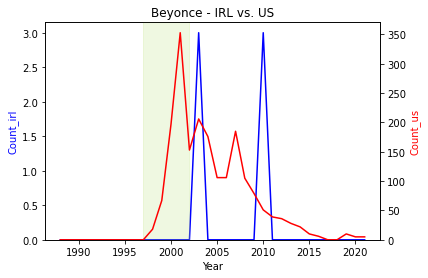

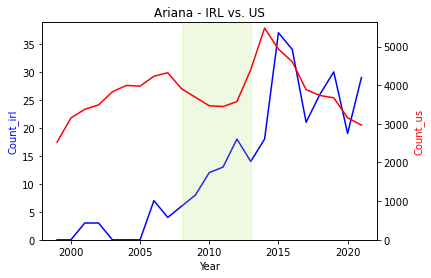

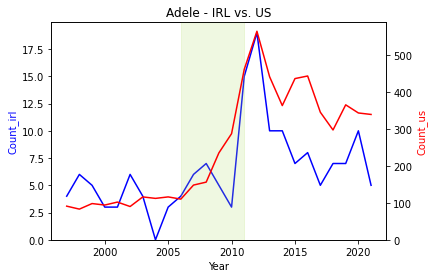

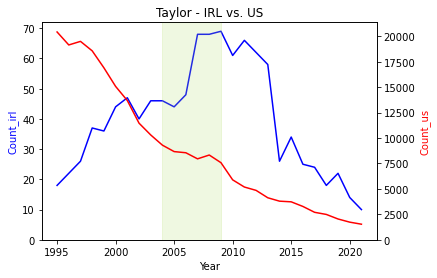

In [53]:
compare_group("Solo Singers",5)

Analyse popularity of name in Ireland by category

In [54]:
#Merge pop_culture_names with irl_AllNames to get the data for just the pop culture names through the years in Ireland 
irl_by_cat = pop_culture_names.merge(irl_AllNames, how='left',left_on=['name','gender'],right_on=['Names','Gender'])
#Replace NaN values with zero
irl_by_cat = irl_by_cat.fillna(0)
#As some pop-culture names have never appeared in Ireland, some years were set to zero so this will only take years from 1964
irl_by_cat = irl_by_cat[irl_by_cat['Year']>=1964]
#Subset data with just the columns required
irl_by_cat = irl_by_cat.loc[:,["category","Year","Count"]]
#Group by category and year and add the "Count" values for each name using Numpy .sum
irl_by_cat = irl_by_cat.groupby(['category',"Year"]).sum()
#Sort by Year then category
irl_by_cat = irl_by_cat.sort_values(['Year','category'])
#Check result by returning top 5 rows
irl_by_cat.head()

,,Count
category,Year,
Beckhams,1964.0,0.0
Kardashians,1964.0,19.0
One Direction,1964.0,266.0
Royals,1964.0,1559.0
Solo Singers,1964.0,0.0


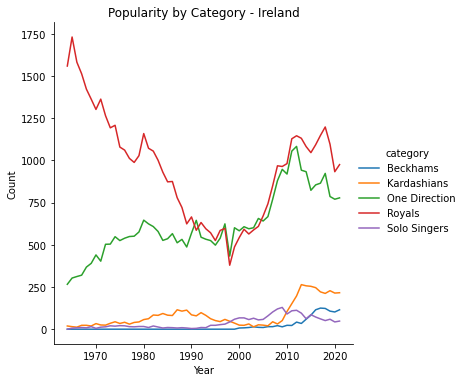

In [56]:
#Using Seaborn plot the above data on a line graph
#Set hue to category to view each category in a different colour
sns.relplot(x="Year", y="Count", 
            data=irl_by_cat,
            kind="line", hue="category")
plt.title("Popularity by Category - Ireland")
plt.show()